<a href="https://colab.research.google.com/github/thuyagu1995/chenna-house-price-predictions/blob/main/final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [85]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.metrics import mean_absolute_error

In [86]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor


In [4]:
df = pd.read_csv("/content/train-chennai-sale.csv")

In [5]:
df.shape

(7109, 22)

In [6]:
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

Data cleaning

---


In [8]:
df['AREA'] = df['AREA'].replace({'Chrompt': 'Chrompet','Chrmpet': 'Chrompet','Chormpet': 'Chrompet'
                                  ,'Karapakam': 'Karapakkam'
                                  ,'KKNagar': 'KK Nagar'
                                  ,'Velchery': 'Velachery'
                                  ,'Ana Nagar': 'Anna Nagar','Ann Nagar':'Anna Nagar'
                                  ,'Adyr': 'Adyar','TNagar':'T Nagar'})
df.to_csv("/content/train-chennai-sale.csv", index=False)

In [9]:
df.AREA.value_counts()

Chrompet      1702
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     788
Adyar          774
T Nagar        501
Name: AREA, dtype: int64

In [10]:
df['SALE_COND'] = df['SALE_COND'].replace({'Adj Land': 'AdjLand','Partiall':'Partial','PartiaLl':'Partial','Ab Normal':'AbNormal'})
df.to_csv("/content/train-chennai-sale.csv", index=False)

In [11]:
df.SALE_COND.value_counts()

AdjLand        1439
Partial        1433
Normal Sale    1423
AbNormal       1411
Family         1403
Name: SALE_COND, dtype: int64

In [12]:
df['PARK_FACIL'] = df['PARK_FACIL'].replace({'Noo':'No'})
df.to_csv("/content/train-chennai-sale.csv", index=False)

In [13]:
df.PARK_FACIL.value_counts()

Yes    3587
No     3522
Name: PARK_FACIL, dtype: int64

In [14]:
df['BUILDTYPE'] = df['BUILDTYPE'].replace({'Comercial':'Commercial','Other':'Others'})
df.to_csv("/content/train-chennai-sale.csv", index=False)

In [15]:
df.BUILDTYPE.value_counts()

House         2444
Others        2336
Commercial    2329
Name: BUILDTYPE, dtype: int64

In [16]:
df['UTILITY_AVAIL'] = df['UTILITY_AVAIL'].replace({'All Pub':'AllPub','NoSeWa':'NoSewr '})
df.to_csv("/content/train-chennai-sale.csv", index=False)

In [17]:
df.UTILITY_AVAIL.value_counts()

NoSewr     3700
AllPub     1887
ELO        1522
Name: UTILITY_AVAIL, dtype: int64

In [18]:
df['STREET'] = df['STREET'].replace({'Pavd':'Paved','NoAccess':'No Access'})
df.to_csv("/content/train-chennai-sale.csv", index=False)

In [19]:
df.STREET.value_counts()

Paved        2572
Gravel       2520
No Access    2017
Name: STREET, dtype: int64

In [20]:
df.MZZONE.value_counts()

RL    1858
RH    1822
RM    1817
C      550
A      537
I      525
Name: MZZONE, dtype: int64

In [21]:
df['sale_year'] = pd.to_datetime(df['DATE_SALE'])

In [22]:
df['build_year'] = pd.to_datetime(df['DATE_BUILD'])

In [23]:
df['Age of building'] = (df['sale_year'].dt.year - df['build_year'].dt.year)


In [24]:
df.drop(['DATE_SALE','DATE_BUILD'],axis = 1,inplace = True)


In [25]:
df.head()

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,...,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,sale_year,build_year,Age of building
0,P03210,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,...,4.0,3.9,4.9,4.330,380000,144400,7600000,2011-04-05,1967-05-15,44
1,P09411,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,...,4.9,4.2,2.5,3.765,760122,304049,21717770,2006-12-19,1995-12-22,11
2,P01812,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,...,4.1,3.8,2.2,3.090,421094,92114,13159200,2012-04-02,1992-09-02,20
3,P05346,Velachery,1855,14,3.0,2.0,5,Family,No,Others,...,4.7,3.9,3.6,4.010,356321,77042,9630290,2010-03-13,1988-03-18,22
4,P06210,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,...,3.0,2.5,4.1,3.290,237000,74063,7406250,2009-05-10,1979-10-13,30


In [26]:
df.shape

(7109, 23)

In [27]:
change_column_pos = df.pop('SALES_PRICE')

In [28]:
df.head()

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,...,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,sale_year,build_year,Age of building
0,P03210,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,...,A,4.0,3.9,4.9,4.330,380000,144400,2011-04-05,1967-05-15,44
1,P09411,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,...,RH,4.9,4.2,2.5,3.765,760122,304049,2006-12-19,1995-12-22,11
2,P01812,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,...,RL,4.1,3.8,2.2,3.090,421094,92114,2012-04-02,1992-09-02,20
3,P05346,Velachery,1855,14,3.0,2.0,5,Family,No,Others,...,I,4.7,3.9,3.6,4.010,356321,77042,2010-03-13,1988-03-18,22
4,P06210,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,...,C,3.0,2.5,4.1,3.290,237000,74063,2009-05-10,1979-10-13,30


In [29]:
df.insert(22,'SALES_PRICE',change_column_pos)
df

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,...,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,sale_year,build_year,Age of building,SALES_PRICE
0,P03210,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,...,4.0,3.9,4.9,4.330,380000,144400,2011-04-05,1967-05-15,44,7600000
1,P09411,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,...,4.9,4.2,2.5,3.765,760122,304049,2006-12-19,1995-12-22,11,21717770
2,P01812,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,...,4.1,3.8,2.2,3.090,421094,92114,2012-04-02,1992-09-02,20,13159200
3,P05346,Velachery,1855,14,3.0,2.0,5,Family,No,Others,...,4.7,3.9,3.6,4.010,356321,77042,2010-03-13,1988-03-18,22,9630290
4,P06210,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,...,3.0,2.5,4.1,3.290,237000,74063,2009-05-10,1979-10-13,30,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,598,51,1.0,1.0,2,AdjLand,No,Others,...,3.0,2.2,2.4,2.520,208767,107060,2011-03-01,1962-01-15,49,5353000
7105,P10000,Velachery,1897,52,3.0,2.0,5,Family,Yes,Others,...,3.6,4.5,3.3,3.920,346191,205551,2004-08-04,1995-11-04,9,10818480
7106,P09594,Velachery,1614,152,2.0,1.0,4,Normal Sale,No,House,...,4.3,4.2,2.9,3.840,317354,167028,2006-08-25,1978-01-09,28,8351410
7107,P06508,Karapakkam,787,40,1.0,1.0,2,Partial,Yes,Commercial,...,4.6,3.8,4.1,4.160,425350,119098,2009-03-08,1977-11-08,32,8507000


In [30]:

df['N_BEDROOM'] = df['N_BEDROOM'].replace(np.nan, 0)
df['N_BATHROOM'] = df['N_BATHROOM'].replace(np.nan, 0)

**Encoding**

In [31]:
df_numeric = df.select_dtypes(exclude=np.number).columns
df_numeric

Index(['PRT_ID', 'AREA', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE',
       'UTILITY_AVAIL', 'STREET', 'MZZONE', 'sale_year', 'build_year'],
      dtype='object')

In [32]:
df['PARK_FACIL'] = df['PARK_FACIL'].replace({'Yes':1,'No':0})
df.to_csv("/content/train-chennai-sale.csv", index=False)

In [33]:
df.PARK_FACIL.value_counts()

1    3587
0    3522
Name: PARK_FACIL, dtype: int64

In [34]:
df['STREET'] = df['STREET'].replace({'Paved':3,'Gravel':2,'No Access':1})
df.to_csv("/content/train-chennai-sale.csv", index=False)

In [35]:
df.STREET.value_counts()

3    2572
2    2520
1    2017
Name: STREET, dtype: int64

In [36]:
mean_df = df.groupby('UTILITY_AVAIL').mean()
mean_df

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,STREET,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,Age of building,SALES_PRICE
UTILITY_AVAIL,,,,,,,,,,,,,,,
AllPub,1403.057764,98.757287,1.682035,1.222046,3.728140,0.491256,2.071542,3.519290,3.489030,3.488447,3.500141,389687.978272,146880.930048,23.834128,1.121002e+07
ELO,1303.386334,101.000657,1.465834,1.156373,3.525624,0.529566,2.006570,3.486399,3.533311,3.447963,3.488492,352675.003285,126778.724047,25.382392,1.046941e+07
NoSewr,1403.738649,99.459730,1.684054,1.230541,3.735676,0.501081,2.110811,3.529324,3.505811,3.499054,3.510902,380416.762973,143861.669459,24.046757,1.090923e+07


In [37]:
df['UTILITY_AVAIL'] = df['UTILITY_AVAIL'].replace({'AllPub':3,'NoSewr ':2,'ELO':1})
df.to_csv("/content/train-chennai-sale.csv", index=False)


In [38]:
df.UTILITY_AVAIL.value_counts()

2    3700
3    1887
1    1522
Name: UTILITY_AVAIL, dtype: int64

In [39]:
meanarea_df = df.groupby('AREA').mean()
meanarea_df

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,UTILITY_AVAIL,STREET,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,Age of building,SALES_PRICE
AREA,,,,,,,,,,,,,,,,
Adyar,958.166667,101.332041,1.170543,1.170543,2.895349,0.505168,1.962532,2.010336,3.500000,3.510594,3.496124,3.498648,322263.179587,72649.600775,22.657623,9.185668e+06
Anna Nagar,1752.998731,100.661168,1.397208,0.997462,4.398477,0.502538,2.010152,1.968274,3.540609,3.477157,3.465863,3.497083,494162.835025,181868.359137,25.342640,1.516820e+07
Chrompet,1003.254994,98.133373,1.165100,0.998237,3.002938,0.507051,2.015276,2.007051,3.499941,3.522268,3.464689,3.495659,291393.096357,102795.611046,22.079318,1.001381e+07
KK Nagar,1903.332999,100.700100,2.811434,1.595787,4.811434,0.485456,2.329990,2.519559,3.548044,3.529589,3.512738,3.529101,509300.316951,213803.278837,17.320963,1.269623e+07
Karapakkam,1103.406296,101.028551,1.308931,1.308931,2.992679,0.492679,2.020498,1.991215,3.496047,3.487994,3.493777,3.491508,294066.408492,121310.526354,27.718155,7.340100e+06
T Nagar,1759.576846,103.516966,1.449102,1.000000,4.449102,0.524950,2.013972,2.035928,3.552894,3.510379,3.530539,3.529253,510572.688623,195333.756487,25.225549,1.561674e+07
Velachery,1741.293578,94.840979,2.374108,1.374108,4.374108,0.527013,1.995923,2.036697,3.523751,3.505199,3.465341,3.501938,386959.715596,154102.203874,30.299694,1.104735e+07


<BarContainer object of 7 artists>

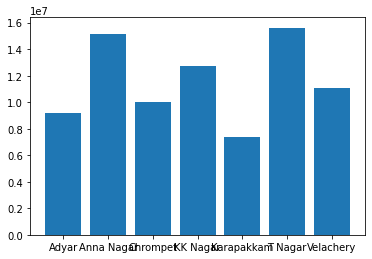

In [40]:
x = meanarea_df.index
y = meanarea_df.SALES_PRICE
plt.bar(x,y)


In [41]:
df['AREA'] = df['AREA'].replace({'T Nagar':7,'Anna Nagar':6,'KK Nagar':5,'Velachery':4,'Chrompet':3,'Adyar':2,'Karapakkam':1})
df.to_csv("/content/train-chennai-sale.csv", index=False)

In [42]:
df.AREA.value_counts()

3    1702
1    1366
5     997
4     981
6     788
2     774
7     501
Name: AREA, dtype: int64

In [43]:
mean_BUildtype = df.groupby('BUILDTYPE').mean()
mean_BUildtype

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,UTILITY_AVAIL,STREET,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,Age of building,SALES_PRICE
BUILDTYPE,,,,,,,,,,,,,,,,,
Commercial,3.572778,1387.922284,101.421211,1.636325,1.209532,3.701589,0.512237,2.080292,2.091885,3.530271,3.494933,3.487892,3.505435,480629.710605,179761.775440,24.117647,1.386984e+07
House,3.506137,1377.745908,98.063421,1.641980,1.223404,3.681260,0.497545,2.042144,2.059329,3.496522,3.510270,3.481178,3.495926,314058.838789,118299.372750,24.474632,9.098847e+06
Others,3.541952,1380.768408,99.401541,1.631849,1.203767,3.683647,0.504281,2.032106,2.083904,3.526627,3.516353,3.487029,3.508778,339344.261558,126121.946918,24.226884,9.807998e+06


<BarContainer object of 3 artists>

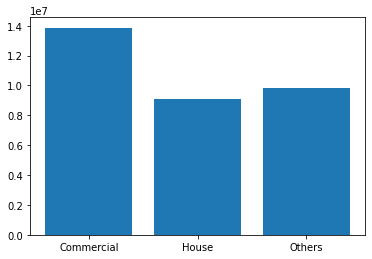

In [44]:
x = mean_BUildtype.index
y = mean_BUildtype.SALES_PRICE
plt.bar(x,y)

In [45]:
df['BUILDTYPE'] = df['BUILDTYPE'].replace({'Commercial':3,'Others':2,'House':1})
df.to_csv("/content/train-chennai-sale.csv", index=False)

In [46]:
df.BUILDTYPE.value_counts()

1    2444
2    2336
3    2329
Name: BUILDTYPE, dtype: int64

In [47]:
mean_SALE_COND = df.groupby('SALE_COND').mean()
mean_SALE_COND

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,Age of building,SALES_PRICE
SALE_COND,,,,,,,,,,,,,,,,,,
AbNormal,3.542169,1380.321758,99.216867,1.627215,1.212615,3.686747,0.517364,1.987952,2.058115,2.092842,3.491566,3.533806,3.492913,3.506954,378119.299079,143433.717931,24.168675,1.091463e+07
AdjLand,3.537874,1378.141765,98.599722,1.629604,1.211258,3.674774,0.516331,1.972203,2.049340,2.070883,3.517095,3.530924,3.493398,3.513680,385905.331480,144465.080612,24.712300,1.120931e+07
Family,3.528154,1373.263008,101.101924,1.622238,1.204562,3.662865,0.491803,1.997862,2.047755,2.066999,3.564505,3.477976,3.481540,3.502304,374932.722737,139461.338560,24.295082,1.073642e+07
Normal Sale,3.537597,1395.781448,99.451862,1.671117,1.227688,3.719606,0.489108,1.986648,2.040759,2.089951,3.503373,3.475966,3.478637,3.488987,380161.541813,143526.953619,24.075193,1.099418e+07
Partial,3.552687,1382.757851,99.674110,1.633636,1.205862,3.699232,0.508025,1.974878,2.060712,2.069784,3.511305,3.517027,3.479972,3.504243,365533.849267,134149.595255,24.125611,1.061637e+07


<BarContainer object of 5 artists>

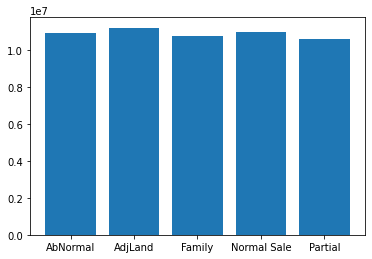

In [48]:
x = mean_SALE_COND.index
y  = mean_SALE_COND.SALES_PRICE
plt.bar(x,y)

In [49]:
df['SALE_COND'] = df['SALE_COND'].replace({'AdjLand':5,'Normal Sale':4,'AbNormal':3,'Family':2,'Partial':1})
df.to_csv("/content/train-chennai-sale.csv", index=False)

In [50]:
df.SALE_COND.value_counts()

5    1439
1    1433
4    1423
3    1411
2    1403
Name: SALE_COND, dtype: int64

In [51]:
mean_MZZONE = df.groupby('MZZONE').mean()
mean_MZZONE

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,Age of building,SALES_PRICE
MZZONE,,,,,,,,,,,,,,,,,,,
A,2.180633,1234.253259,96.646182,1.523277,1.214153,3.312849,3.026071,0.527002,1.929236,2.050279,2.005587,3.502235,3.545996,3.533147,3.534146,269469.553073,97940.890130,27.180633,7.292591e+06
C,2.170909,1249.341818,97.820000,1.589091,1.287273,3.367273,2.963636,0.500000,2.000000,1.989091,1.970909,3.492364,3.535091,3.448182,3.492285,300000.741818,105362.947273,26.903636,8.052270e+06
I,2.135238,1255.264762,101.580952,1.596190,1.300952,3.371429,3.005714,0.487619,2.026667,1.944762,2.028571,3.542476,3.540190,3.427048,3.480849,318384.634286,113921.577143,27.584762,8.738633e+06
RH,3.892426,1407.818332,100.332053,1.622393,1.190450,3.735456,3.010977,0.504940,1.993963,2.063666,2.114160,3.535950,3.512294,3.479418,3.510993,377471.638858,144007.429199,23.675082,1.103997e+07
RL,3.955328,1434.201292,100.467707,1.691066,1.203445,3.833154,3.006997,0.511841,1.964478,2.082347,2.103337,3.499354,3.468891,3.502530,3.492219,401072.287406,151552.556512,23.178687,1.176576e+07
RM,3.982939,1423.456247,98.830490,1.655476,1.194827,3.794166,3.001101,0.496423,1.992295,2.057237,2.084205,3.522345,3.511998,3.487507,3.507443,423693.707210,158553.008806,23.391855,1.240707e+07


<BarContainer object of 6 artists>

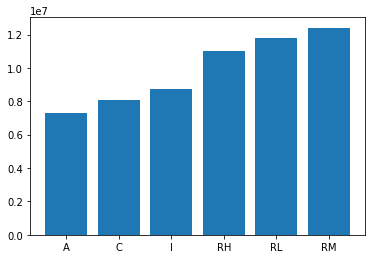

In [52]:
x = mean_MZZONE.index
y  = mean_MZZONE.SALES_PRICE
plt.bar(x,y)

In [53]:
df['MZZONE'] = df['MZZONE'].replace({'RM':6,'RL':5,'RH':4,'I':3,'C':2,'A':1})
df.to_csv("/content/train-chennai-sale.csv", index=False)

In [54]:
df.MZZONE.value_counts()

5    1858
4    1822
6    1817
2     550
1     537
3     525
Name: MZZONE, dtype: int64

In [55]:
df.head()

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,...,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,sale_year,build_year,Age of building,SALES_PRICE
0,P03210,1,1004,131,1.0,1.0,3,3,1,3,...,4.0,3.9,4.9,4.330,380000,144400,2011-04-05,1967-05-15,44,7600000
1,P09411,6,1986,26,2.0,1.0,5,3,0,3,...,4.9,4.2,2.5,3.765,760122,304049,2006-12-19,1995-12-22,11,21717770
2,P01812,2,909,70,1.0,1.0,3,3,1,3,...,4.1,3.8,2.2,3.090,421094,92114,2012-04-02,1992-09-02,20,13159200
3,P05346,4,1855,14,3.0,2.0,5,2,0,2,...,4.7,3.9,3.6,4.010,356321,77042,2010-03-13,1988-03-18,22,9630290
4,P06210,1,1226,84,1.0,1.0,3,3,1,2,...,3.0,2.5,4.1,3.290,237000,74063,2009-05-10,1979-10-13,30,7406250


In [56]:
df.shape

(7109, 23)

In [57]:
corr_matrix=df.corr()
corr_matrix

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,Age of building,SALES_PRICE
AREA,1.000000,0.685243,0.003487,0.320576,-0.044881,0.644971,-0.001571,0.007916,0.014790,0.053165,0.074819,0.346385,0.022620,0.002351,0.004147,0.017817,0.578983,0.454726,-0.072180,0.694149
INT_SQFT,0.685243,1.000000,0.002022,0.786001,0.514124,0.951279,0.004029,0.004618,0.009084,0.070971,0.100106,0.143226,0.019850,-0.008337,0.008865,0.014025,0.657544,0.571076,-0.012610,0.612125
DIST_MAINROAD,0.003487,0.002022,1.000000,-0.002971,0.001290,0.002301,-0.009342,-0.009448,0.023924,-0.013213,0.013666,0.007334,0.002237,-0.029468,0.001554,-0.017313,0.011600,0.010994,-0.003559,0.018783
N_BEDROOM,0.320576,0.786001,-0.002971,1.000000,0.753795,0.839947,0.007113,-0.009178,-0.002944,0.087657,0.120830,0.049719,0.014693,-0.007375,0.016041,0.014395,0.455345,0.430413,-0.045900,0.330909
N_BATHROOM,-0.044881,0.514124,0.001290,0.753795,1.000000,0.566998,0.011634,-0.014319,-0.014035,0.051315,0.060867,-0.048489,0.014599,-0.011955,0.013162,0.008365,0.259561,0.257351,-0.021276,0.108414
N_ROOM,0.644971,0.951279,0.002301,0.839947,0.566998,1.000000,0.000969,-0.000934,0.008122,0.064489,0.089727,0.163697,0.016524,-0.007545,0.015072,0.015459,0.630932,0.533343,-0.033316,0.602760
SALE_COND,-0.001571,0.004029,-0.009342,0.007113,0.011634,0.000969,1.000000,0.003936,-0.002842,-0.006121,0.004401,0.000122,-0.007720,0.004049,0.003840,0.001547,0.045660,0.044505,0.011045,0.054370
PARK_FACIL,0.007916,0.004618,-0.009448,-0.009178,-0.014319,-0.000934,0.003936,1.000000,0.012029,-0.025735,0.007024,-0.007192,-0.008128,-0.011935,-0.001165,-0.009634,0.140049,0.097484,-0.009010,0.146428
BUILDTYPE,0.014790,0.009084,0.023924,-0.002944,-0.014035,0.008122,-0.002842,0.012029,1.000000,0.022354,0.016744,0.004869,0.015595,-0.006898,0.003118,0.007498,0.474301,0.317757,-0.011893,0.515717
UTILITY_AVAIL,0.053165,0.070971,-0.013213,0.087657,0.051315,0.064489,-0.006121,-0.025735,0.022354,1.000000,0.024583,0.027885,0.011584,-0.016800,0.014410,0.006395,0.086836,0.084672,-0.041584,0.067147


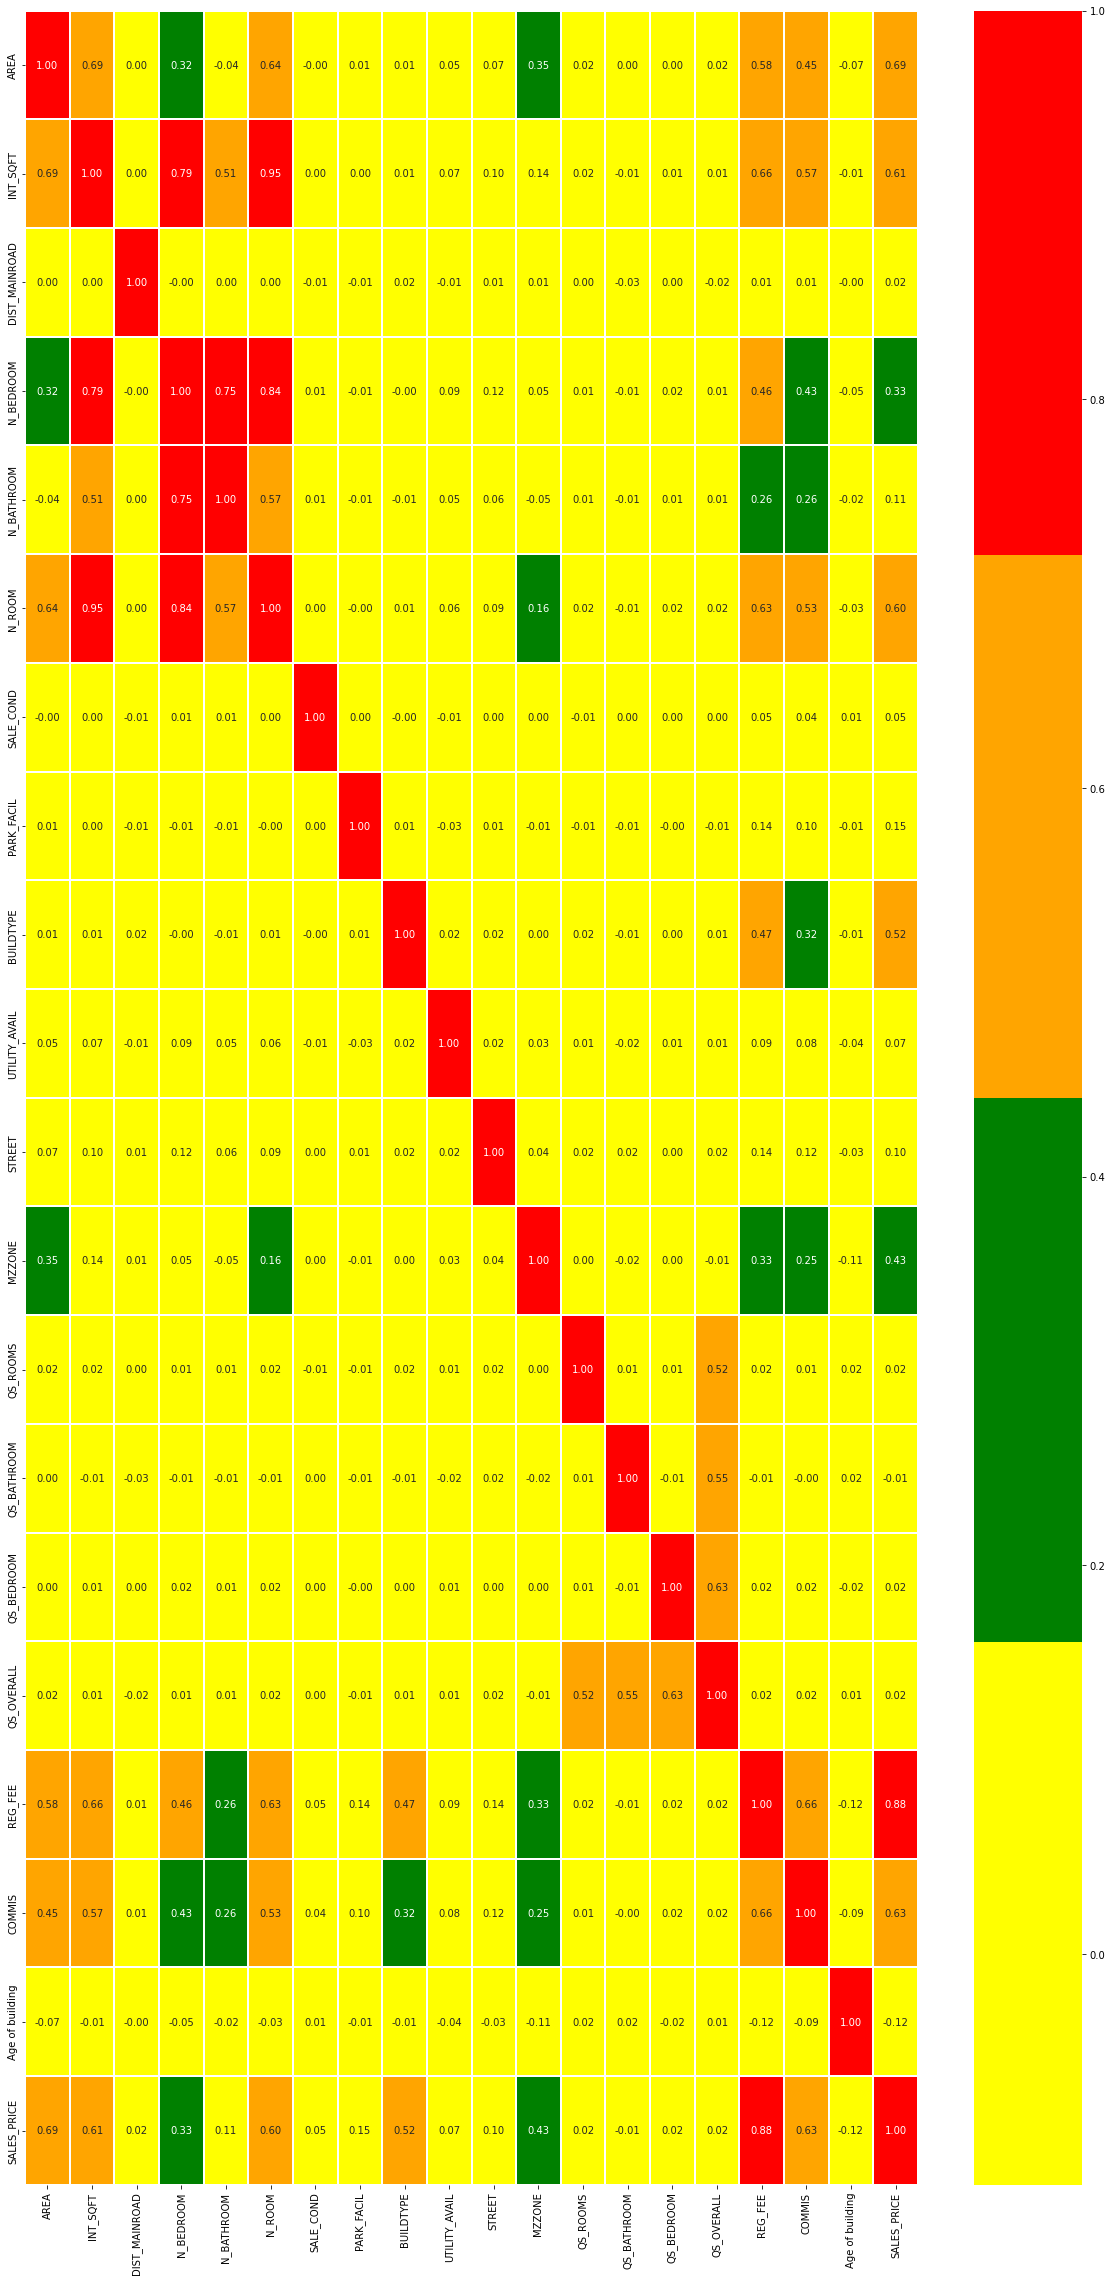

In [58]:

plt.figure(figsize=(20,40))
sns.heatmap(corr_matrix,
           annot=True,
           linewidth=1,
           fmt=".2f",
           cmap=['yellow','green','orange','red'])

In [59]:
df.drop(['DIST_MAINROAD','SALE_COND','PRT_ID','UTILITY_AVAIL','QS_ROOMS','QS_BATHROOM','QS_BEDROOM','QS_OVERALL','sale_year','build_year'],axis=1, inplace=True)

In [60]:
df

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,BUILDTYPE,STREET,MZZONE,REG_FEE,COMMIS,Age of building,SALES_PRICE
0,1,1004,1.0,1.0,3,1,3,3,1,380000,144400,44,7600000
1,6,1986,2.0,1.0,5,0,3,2,4,760122,304049,11,21717770
2,2,909,1.0,1.0,3,1,3,2,5,421094,92114,20,13159200
3,4,1855,3.0,2.0,5,0,2,3,3,356321,77042,22,9630290
4,1,1226,1.0,1.0,3,1,2,2,2,237000,74063,30,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,1,598,1.0,1.0,2,0,2,1,6,208767,107060,49,5353000
7105,4,1897,3.0,2.0,5,1,2,1,4,346191,205551,9,10818480
7106,4,1614,2.0,1.0,4,0,1,2,3,317354,167028,28,8351410
7107,1,787,1.0,1.0,2,1,3,3,5,425350,119098,32,8507000


In [61]:
X=df.drop("SALES_PRICE", axis=1)

y=df.SALES_PRICE.values

In [62]:
X.head()

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,BUILDTYPE,STREET,MZZONE,REG_FEE,COMMIS,Age of building
0,1,1004,1.0,1.0,3,1,3,3,1,380000,144400,44
1,6,1986,2.0,1.0,5,0,3,2,4,760122,304049,11
2,2,909,1.0,1.0,3,1,3,2,5,421094,92114,20
3,4,1855,3.0,2.0,5,0,2,3,3,356321,77042,22
4,1,1226,1.0,1.0,3,1,2,2,2,237000,74063,30


In [63]:
X.shape

(7109, 12)

In [64]:
y

array([ 7600000, 21717770, 13159200, ...,  8351410,  8507000,  9976480])

In [65]:
y.shape

(7109,)

Test train Splitting

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 6)

> **Standardisation**

In [67]:
scaler = preprocessing.StandardScaler()
transformed_X_train = scaler.fit_transform(X_train)
transformed_X_train = pd.DataFrame(transformed_X_train, columns =['x1', 'x2','X3','X4','X5','X6','X7','X8','X9','X10','X11','X12'])

In [68]:
transformed_X_test = scaler.fit_transform(X_test)
transformed_X_test = pd.DataFrame(transformed_X_test, columns =['x1', 'x2','X3','X4','X5','X6','X7','X8','X9','X10','X11','X12'])

**MODELING**

In [84]:

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print('model SCORE:',metrics.r2_score(y_test,y_pred))

model SCORE: 0.9054099772600032


In [90]:
lr = LinearRegression()
lr.fit(transformed_X_train, y_train)
y_pred = lr.predict(transformed_X_test)
print('model SCORE:',metrics.r2_score(y_test,y_pred))

model SCORE: 0.9049708208095663


In [92]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print('model SCORE:', metrics.r2_score(y_test,y_pred_dt))

model SCORE: 0.9538254750815398


In [77]:
dt = DecisionTreeRegressor()
dt.fit(transformed_X_train, y_train)
y_pred_dt = dt.predict(transformed_X_test)
print('model SCORE:', metrics.r2_score(y_test,y_pred_dt))

R2- SCORE: 0.9543234546706935
